In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
baba_long_data = yf.download("BABA", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
baba_long_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BABA,BABA,BABA,BABA,BABA,BABA
Date,,,,,,
2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
2014-09-24,87.467674,90.570000,90.570000,87.220001,88.470001,32088000
2014-09-25,85.874184,88.919998,91.500000,88.500000,91.089996,28598000


In [4]:
baba_long_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BABA,BABA,BABA,BABA,BABA,BABA
Date,,,,,,
2025-01-08,83.690002,83.690002,83.790001,82.720001,83.089996,9661800
2025-01-10,80.529999,80.529999,82.250000,80.400002,82.250000,15393900
2025-01-13,80.540001,80.540001,81.080002,80.059998,80.150002,10726600
2025-01-14,81.680000,81.680000,82.650002,81.489998,82.389999,8762600
2025-01-15,82.389999,82.389999,82.790001,82.154999,82.629997,3179695


In [5]:
# check for the missing values
baba_long_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,BABA,0
Close,BABA,0
High,BABA,0
Low,BABA,0
Open,BABA,0
Volume,BABA,0


In [6]:
baba_long_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2597 entries, 2014-09-19 to 2025-01-15
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BABA)  2597 non-null   float64
 1   (Close, BABA)      2597 non-null   float64
 2   (High, BABA)       2597 non-null   float64
 3   (Low, BABA)        2597 non-null   float64
 4   (Open, BABA)       2597 non-null   float64
 5   (Volume, BABA)     2597 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.0 KB


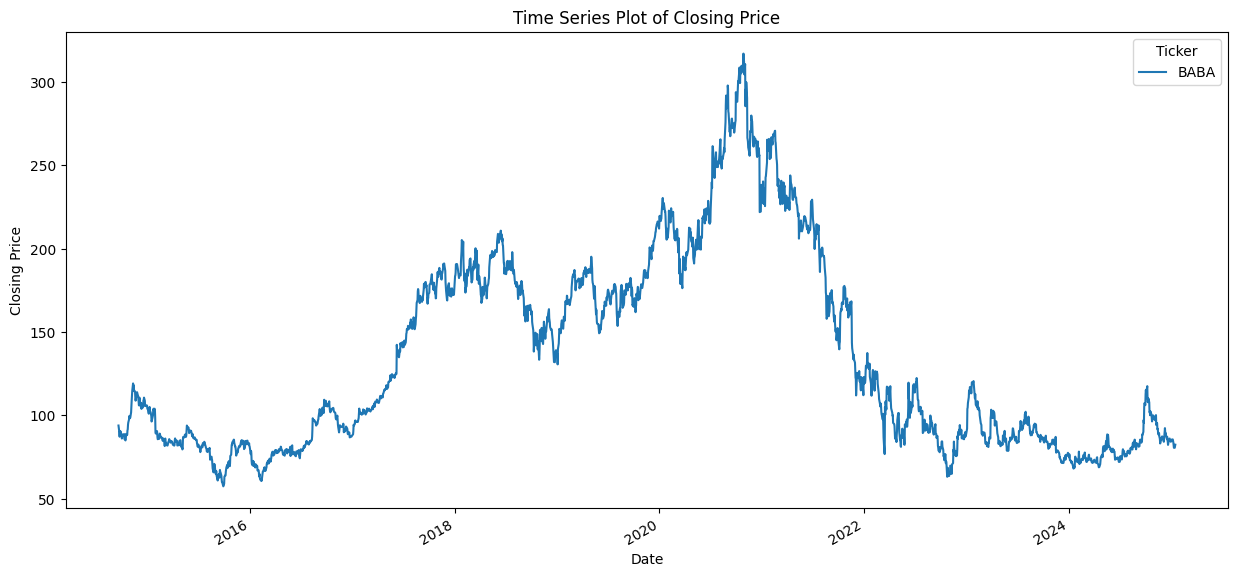

In [7]:
# time series plot
baba_long_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

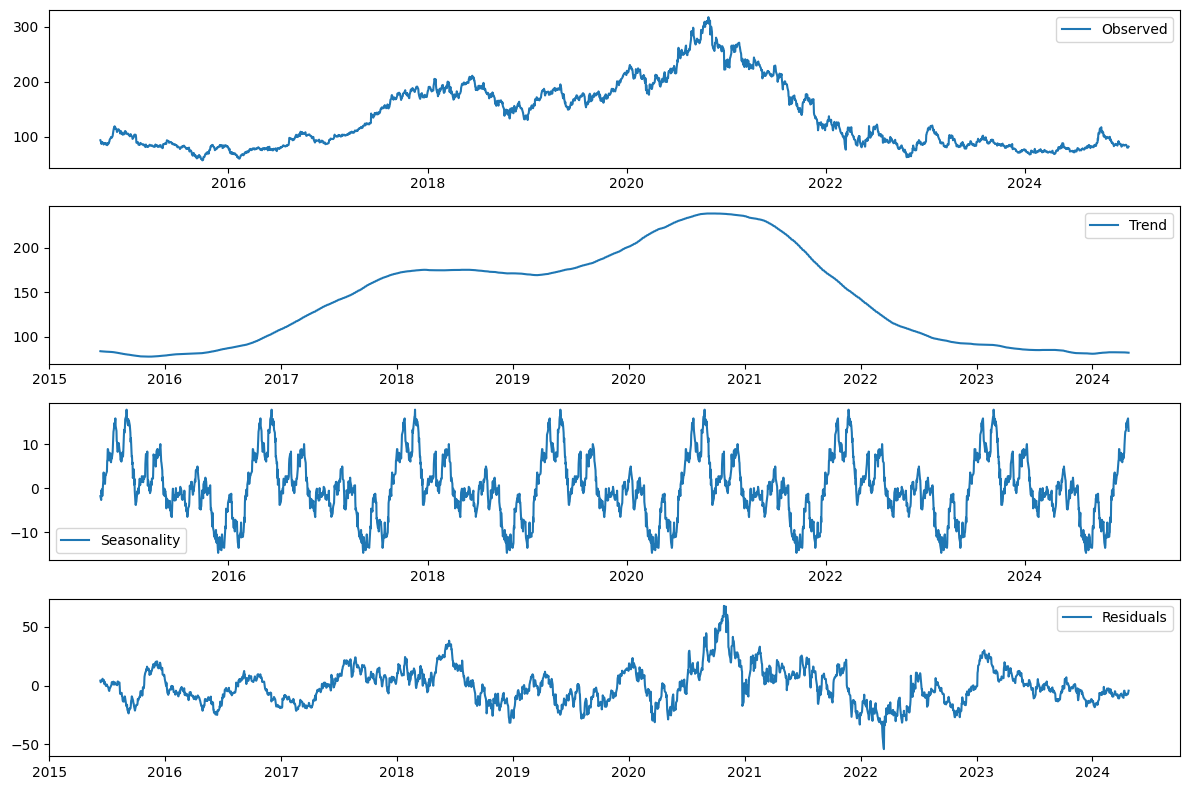

In [8]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(baba_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

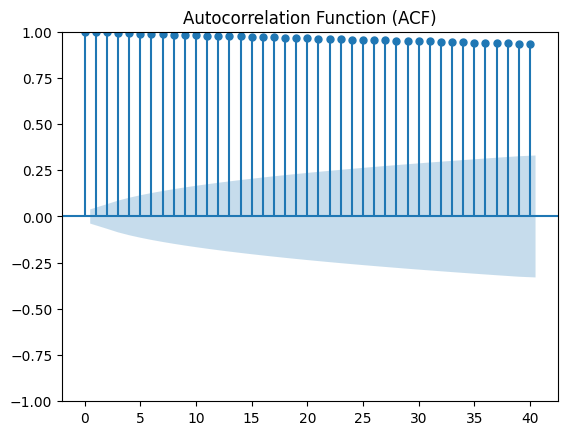

In [9]:
plt.figure(figsize=(10, 5))
plot_acf(baba_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

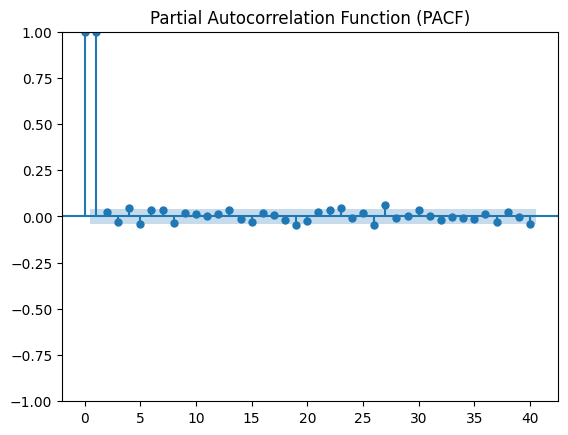

In [10]:
plt.figure(figsize=(10, 5))
plot_pacf(baba_long_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [11]:
# get the Date out of the index
baba_long_data.reset_index(inplace=True)

In [12]:
# isolet the Date and Sales columns
baba_long_data = baba_long_data[['Date', 'Close']]

In [13]:
baba_long_data

Price,Date,Close
Ticker,,BABA
0,2014-09-19,93.889999
1,2014-09-22,89.889999
2,2014-09-23,87.169998
3,2014-09-24,90.570000
4,2014-09-25,88.919998
...,...,...
2592,2025-01-08,83.690002
2593,2025-01-10,80.529999
2594,2025-01-13,80.540001


In [14]:
# Split into training and testing sets based on index
train_size = int(len(baba_long_data) * 0.8)  # 80% for training
train_data = baba_long_data[:train_size]
test_data = baba_long_data[train_size:]

In [15]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [16]:
train_data

Price,Close
Ticker,BABA
Date,
2014-09-19,93.889999
2014-09-22,89.889999
2014-09-23,87.169998
2014-09-24,90.570000
2014-09-25,88.919998
...,...
2022-12-12,89.410004
2022-12-13,91.410004


In [17]:
test_data

Price,Close
Ticker,BABA
Date,
2022-12-19,87.160004
2022-12-20,85.919998
2022-12-21,87.809998
2022-12-22,87.970001
2022-12-23,85.650002
...,...
2025-01-08,83.690002
2025-01-10,80.529999


In [18]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2014-09-19 00:00:00'), Timestamp('2022-12-16 00:00:00'))

In [19]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2022-12-19 00:00:00'), Timestamp('2025-01-15 00:00:00'))

In [20]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [21]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [22]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [23]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1122
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0153
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0013
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0010
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0010
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
16.611510753631592


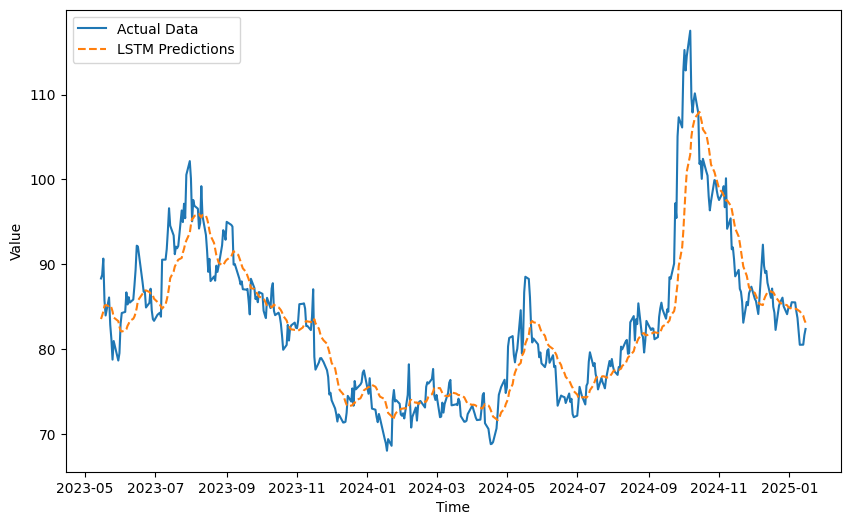

In [24]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [25]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

3.2184841519891627


In [26]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

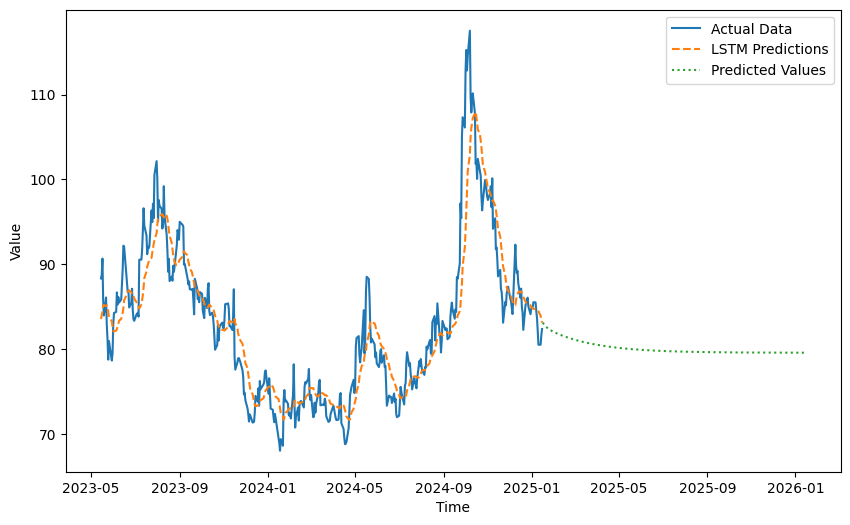

In [27]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()